In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid', font_scale = 1.5, color_codes=True)
sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("/home/nikolaevra/datasets/elo/historical_transactions.csv", nrows=900000)

In [3]:
df.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [4]:
df.columns

Index(['authorized_flag', 'card_id', 'city_id', 'category_1', 'installments',
       'category_3', 'merchant_category_id', 'merchant_id', 'month_lag',
       'purchase_amount', 'purchase_date', 'category_2', 'state_id',
       'subsector_id'],
      dtype='object')

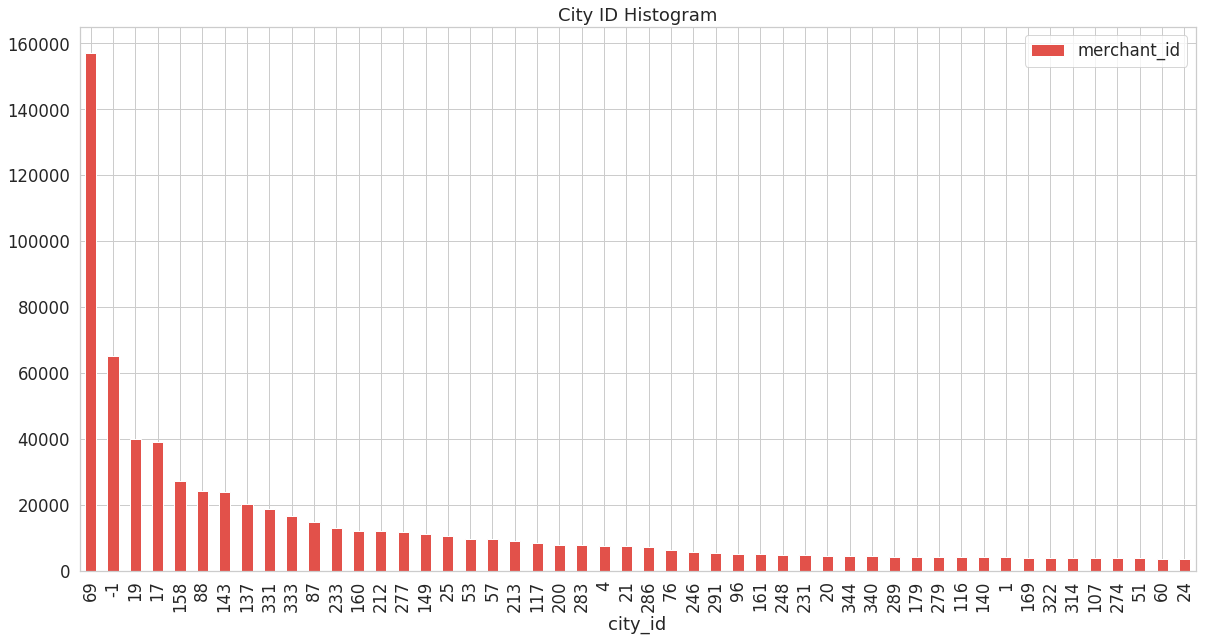

In [5]:
ax = df.groupby('city_id').count().sort_values(by=['merchant_id'], ascending=False)[['merchant_id']].head(50).plot(kind='bar', figsize=(20,10))# x='city_id', y='merchant_id')
ax.set_title('City ID Histogram')
fig = ax.get_figure()
fig.savefig('../diagrams/city_id_histogram.png')

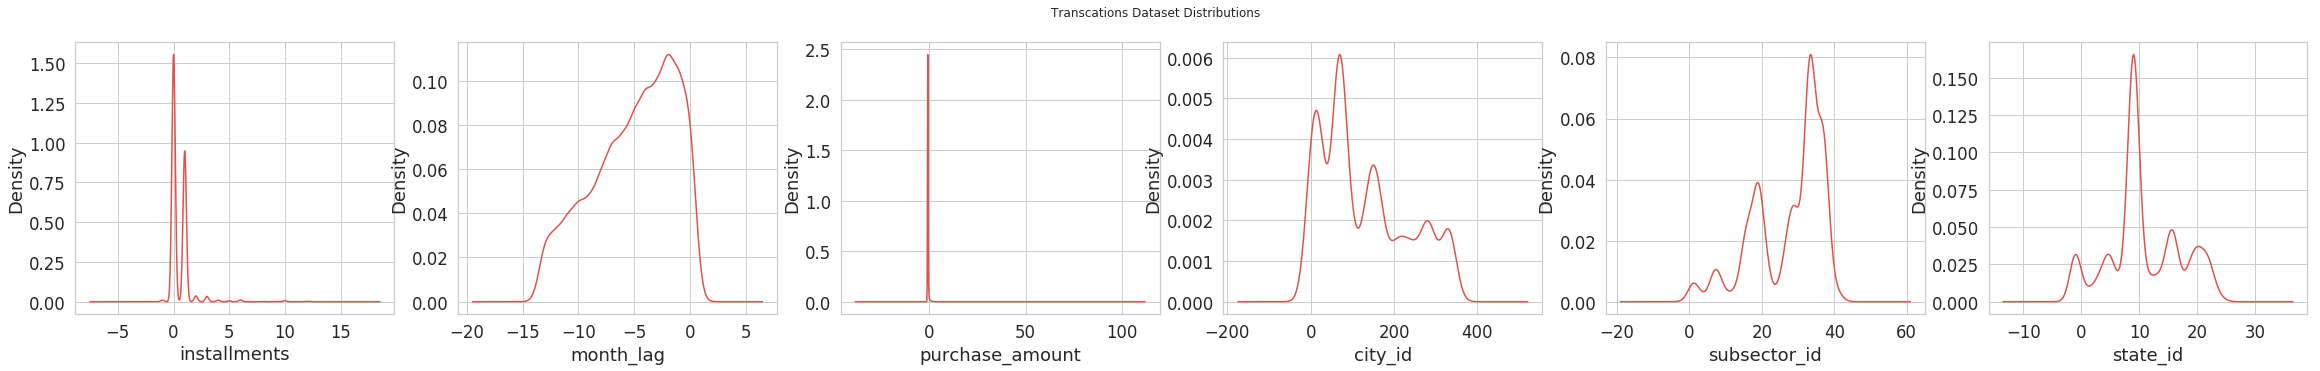

In [14]:
cols = ['installments', 'month_lag', 'purchase_amount', 'city_id', 'subsector_id', 'state_id']
fig, axes = plt.subplots(nrows=1, ncols=len(cols), figsize=(40,5))

for i, col in enumerate(cols):
    df[col].sample(10000).dropna().plot(ax=axes[i], kind='kde')
    axes[i].set_xlabel(col)
    
fig.suptitle('Transcations Dataset Distributions')
plt.savefig("../diagrams/transactions_distributions.png")
plt.show()

In [8]:
merch_df = pd.read_csv("/home/nikolaevra/datasets/elo/merchants.csv")

In [9]:
merch_df.columns

Index(['merchant_id', 'merchant_group_id', 'merchant_category_id',
       'subsector_id', 'numerical_1', 'numerical_2', 'category_1',
       'most_recent_sales_range', 'most_recent_purchases_range',
       'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3',
       'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6',
       'avg_sales_lag12', 'avg_purchases_lag12', 'active_months_lag12',
       'category_4', 'city_id', 'state_id', 'category_2'],
      dtype='object')

In [10]:
merch_df.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


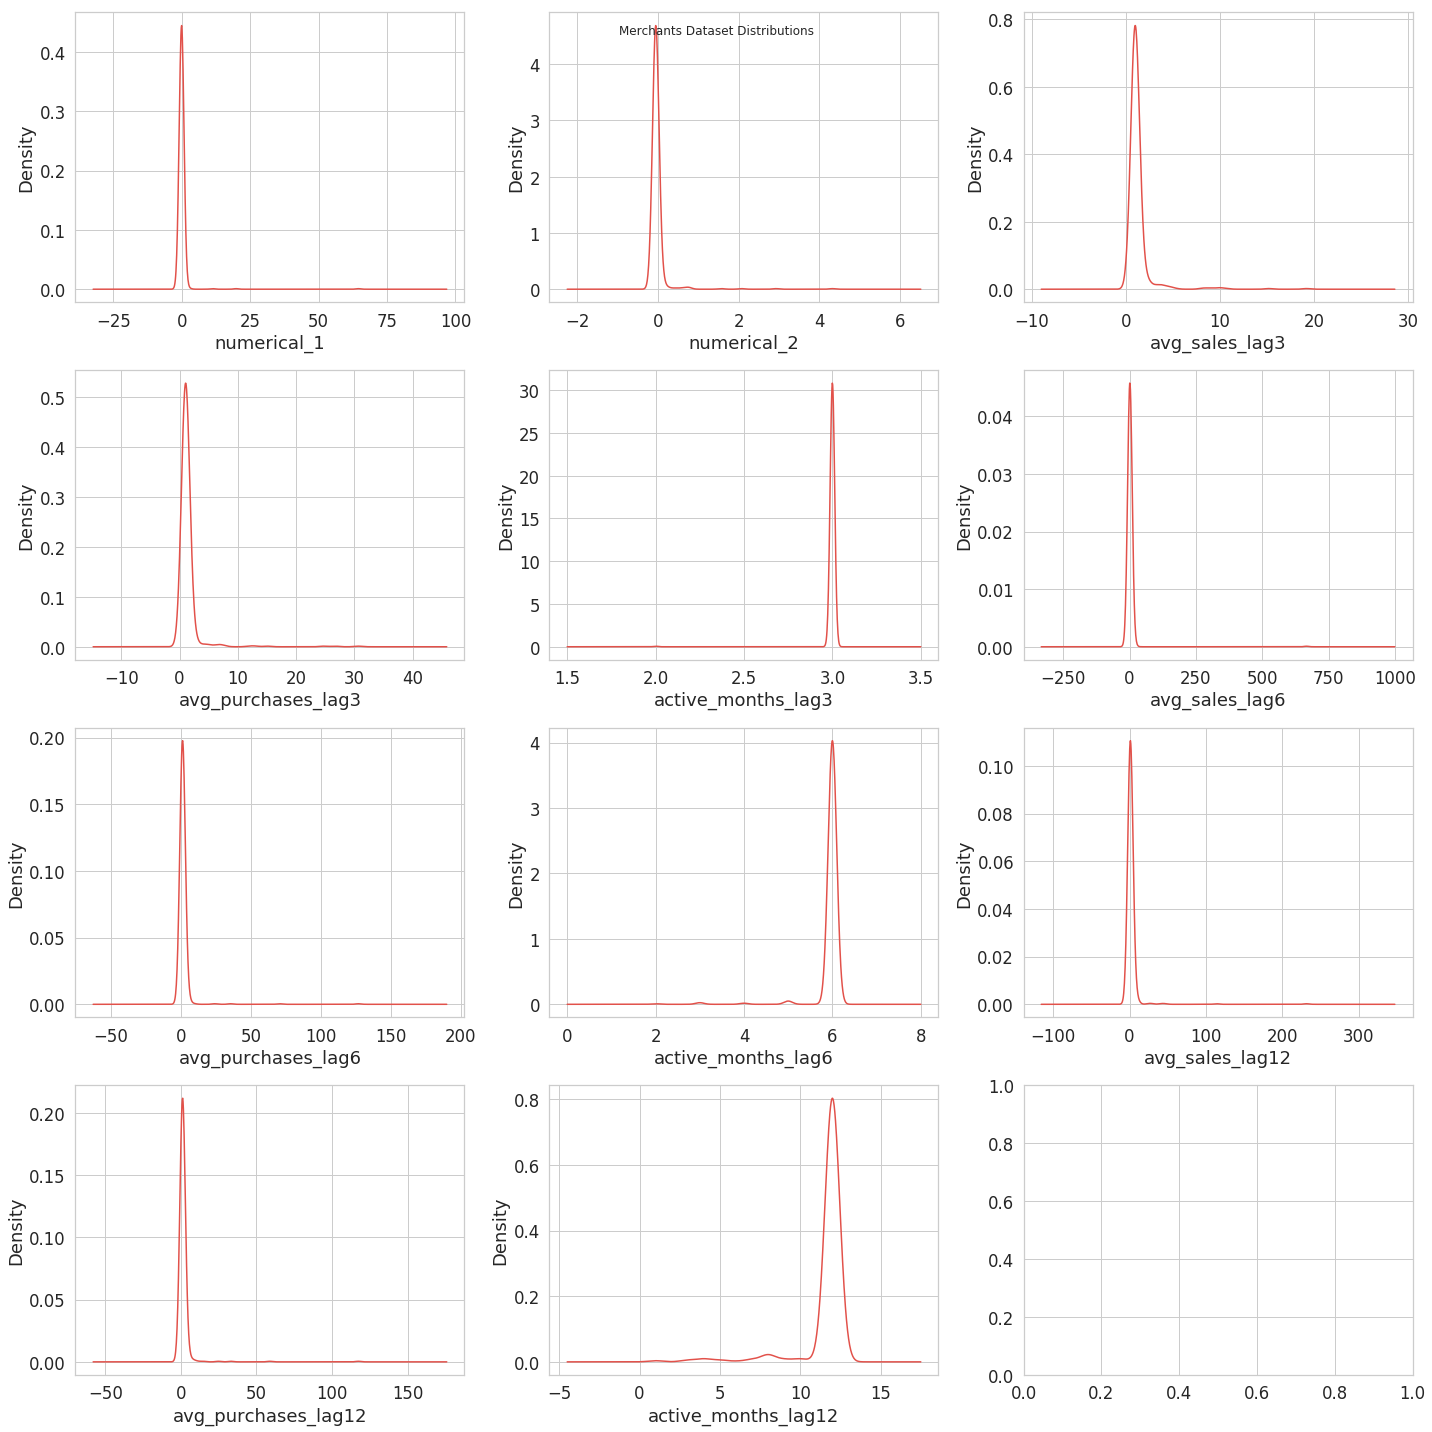

In [15]:
cols = [
    'numerical_1', 'numerical_2', 'avg_sales_lag3', 'avg_purchases_lag3', 'active_months_lag3', 
    'avg_sales_lag6', 'avg_purchases_lag6', 'active_months_lag6', 'avg_sales_lag12', 'avg_purchases_lag12', 
    'active_months_lag12'
]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20,20))
k = 0

for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        merch_df[cols[k]].dropna().sample(500).dropna().plot(ax=axes[i, j], kind='kde')
        axes[i, j].set_xlabel(cols[k])
        k+=1
        if k >= len(cols):
            break

fig.suptitle('Merchants Dataset Distributions')
plt.tight_layout()
plt.savefig("../diagrams/merchants_distributions.png")
plt.show()